In [1]:
import pandas as pd
import numpy as np

years = np.array(['1953-54', '1954-55', '1955-56', '1956-57', '1957-58', '1958-59'])

first_quarter = np.array([3575, 3867, 4669, 4693, 5518, 6523])
second_quarter = np.array([4342, 4404, 5327, 5640, 6887, 9808])
third_quarter = np.array([4435, 5726, 5811, 5957, 7782, 10149])
fourth_quarter = np.array([10191, 9816, 10350, 12961, 19718, 25510])

expenditure_dictionary = {
    'Years' : years,
    'Apr - Jun' : first_quarter,
    'Jul - Sep' : second_quarter,
    'Oct - Dec' : third_quarter,
    'Jan - Mar' : fourth_quarter
}

expenditure_dataframe = pd.DataFrame(expenditure_dictionary)

#### The data related to the revenue expenditure, Goverment of India, during the years 1953-54 to 1958-59 for the four quarters ::

In [2]:
expenditure_dataframe

,Years,Apr - Jun,Jul - Sep,Oct - Dec,Jan - Mar
0,1953-54,3575,4342,4435,10191
1,1954-55,3867,4404,5726,9816
2,1955-56,4669,5327,5811,10350
3,1956-57,4693,5640,5957,12961
4,1957-58,5518,6887,7782,19718
5,1958-59,6523,9808,10149,25510


#### First we shall fit a polynomial of degree 2 to this data, by the principle of least squares

In [3]:
total_expenditure_of_years = np.zeros(len(years))

for i in range(len(years)) :
    total_expenditure_of_years[i] = first_quarter[i] + second_quarter[i] + third_quarter[i] + fourth_quarter[i]
    
dictionary_1 = {
    'Years' : years,
    'Total Expenditure' : total_expenditure_of_years
}

dataframe_1 = pd.DataFrame(dictionary_1)

dataframe_1

,Years,Total Expenditure
0,1953-54,22543.0
1,1954-55,23813.0
2,1955-56,26157.0
3,1956-57,29251.0
4,1957-58,39905.0
5,1958-59,51990.0


#### Let our trend equation be $$ Y_t = a_0 + a_1 t + a_2 t^2 $$

with some chosen **origin**  and **unit**.

### We shall do calculations on the basis of the following table and then we shall adjust our equation according to our necessity.

In [4]:
years_1 = np.array(['1953', '1954', '1955', '1956', '1957', '1958'])

new_dictionary = {
    'Years' : years_1,
    'Total Expenditure' : total_expenditure_of_years
}

new_dataframe = pd.DataFrame(new_dictionary)

new_dataframe

,Years,Total Expenditure
0,1953,22543.0
1,1954,23813.0
2,1955,26157.0
3,1956,29251.0
4,1957,39905.0
5,1958,51990.0


#### We consider the mid-point of 1955 and 1956 as the mid-point of our data. And we take t = 2(year - midpoint)

In [5]:
t = np.array([-5, -3, -1, 1, 3, 5])

t_square = t**2

t_cube = t**3

t_four = t**4

t_times_y_t = t * total_expenditure_of_years

t_square_times_y_t = t_square * total_expenditure_of_years

In [6]:
update_dictionary = {
    'Years' : years_1,
    't' : t,
    't^2' : t_square,
    't^3' : t_cube,
    't^4' : t_four,
    't * yt' : t_times_y_t,
    't^2 * yt' : t_square_times_y_t
}

dictionary_1.update(update_dictionary)

dataframe_2 = pd.DataFrame(dictionary_1)

dataframe_2

,Years,Total Expenditure,t,t^2,t^3,t^4,t * yt,t^2 * yt
0,1953,22543.0,-5,25,-125,625,-112715.0,563575.0
1,1954,23813.0,-3,9,-27,81,-71439.0,214317.0
2,1955,26157.0,-1,1,-1,1,-26157.0,26157.0
3,1956,29251.0,1,1,1,1,29251.0,29251.0
4,1957,39905.0,3,9,27,81,119715.0,359145.0
5,1958,51990.0,5,25,125,625,259950.0,1299750.0


In [7]:
sum_yt = np.sum(total_expenditure_of_years)

sum_t = np.sum(t)

sum_t_square = np.sum(t_square)

sum_t_cube = np.sum(t_cube)

sum_t_four = np.sum(t_four)

sum_t_into_yt = np.sum(t_times_y_t)

sum_t_square_into_yt = np.sum(t_square_times_y_t)

In [8]:
print(f"Sum of t = {sum_t}")

print(f"Sum of t_square = {sum_t_square}")

print(f"Sum of t_cube = {sum_t_cube}")

print(f"Sum of t_four = {sum_t_four}")

print(f"Sum of y_t = {sum_yt}")

print(f"Sum of t * y_t = {sum_t_into_yt}")

print(f"Sum of t^2 * y_t = {sum_t_square_into_yt}")

Sum of t = 0
Sum of t_square = 70
Sum of t_cube = 0
Sum of t_four = 1414
Sum of y_t = 193659.0
Sum of t * y_t = 198605.0
Sum of t^2 * y_t = 2492195.0


### The normal equations are as follows :

$$ 193659.0 = 6a_0 + 70a_2 $$
$$ 198605.0 = 70a_1 $$
$$ 2492195.0 = 70a_0 + 1414a_2 $$

### Solving the normal equations, we get the trend equation as :

$$ Y_t = 27728.843750 + 2837.21t + 389.799072t^2 $$

### Writing t/4 for t in the equation we get :

$$ Y_t = 6932.21 + 709.30t + 97.45t^2 $$

### Writing t/2 for t in the equation we get : (to get trend equation for quarterly values)

$$ Y_t = 6932.21 + 354.65t + 24.36t^2 $$

### Writing t+0.5 for t in the equation we get :

$$ Y_t = 7115.63 + 379.01t + 24.36t^2 $$

with **origin** = mid-point of first quarter of 1956-57 and **unit** = 1 quarter

### Now we shall calculate the trend values for all the quarters :

In [9]:
def our_curve(x) :
    value = 7115.63 + 379.01 * x + 24.36 * (x**2)
    return value

trend_values = np.zeros(24)

for i in range(-12, 12) :
    trend_values[i+12] = our_curve(i)

trend_values_reshaped = trend_values.reshape(6, 4)

dataframe_3 = pd.DataFrame(data = trend_values_reshaped,
                          columns = ['Apr - Jun', 'Jul - Sep', 'Oct - Dec', 'Jan - Mar'])

dataframe_3.insert(0, 'Years', years, True)

dataframe_3

,Years,Apr - Jun,Jul - Sep,Oct - Dec,Jan - Mar
0,1953-54,6075.35,5894.08,5761.53,5677.70
1,1954-55,5642.59,5656.20,5718.53,5829.58
2,1955-56,5989.35,6197.84,6455.05,6760.98
3,1956-57,7115.63,7519.00,7971.09,8471.90
4,1957-58,9021.43,9619.68,10266.65,10962.34
5,1958-59,11706.75,12499.88,13341.73,14232.30


### Now we shall calculate the Trend-Ratios i.e. the original values as % of trend values

In [10]:
original_values = np.array(expenditure_dataframe[expenditure_dataframe.columns[1:]])

original_values = original_values.ravel()

trend_ratios = np.zeros(24)

for i in range(24) :
    trend_ratios[i] = (original_values[i] / trend_values[i]) * 100
    trend_ratios[i] = round(trend_ratios[i], 2)

trend_ratios_reshaped = trend_ratios.reshape(6, 4)

dataframe_4 = pd.DataFrame(data = trend_ratios_reshaped,
                          columns = ['Apr - Jun', 'Jul - Sep', 'Oct - Dec', 'Jan - Mar'])

dataframe_4.insert(0, 'Years', years, True)

dataframe_4

,Years,Apr - Jun,Jul - Sep,Oct - Dec,Jan - Mar
0,1953-54,58.84,73.67,76.98,179.49
1,1954-55,68.53,77.86,100.13,168.38
2,1955-56,77.96,85.95,90.02,153.08
3,1956-57,65.95,75.01,74.73,152.99
4,1957-58,61.17,71.59,75.80,179.87
5,1958-59,55.72,78.46,76.07,179.24


### Evaluating Adjusted Seasonal Indices :

In [11]:
average = trend_ratios_reshaped.mean(axis = 0)

sums = sum(average)

k = 400 / sums

adjusted_seasonal_indices = np.zeros(4)

for i in range(len(average)) :
    adjusted_seasonal_indices[i] = average[i] * k

In [12]:
my_array = np.concatenate((average, adjusted_seasonal_indices))

my_array = my_array.reshape(2, 4)

dataframe_5 = pd.DataFrame(data = my_array,
                          columns = ['Apr - Jun', 'Jul - Sep', 'Oct - Dec', 'Jan - Mar'])

dataframe_5.insert(0, '0', ['Average (A.M.) (Seasonal Indices))', 'Adjusted Seasonal Indices'])

dataframe_5

,0,Apr - Jun,Jul - Sep,Oct - Dec,Jan - Mar
0,Average (A.M.) (Seasonal Indices)),64.695000,77.090000,82.288333,168.841667
1,Adjusted Seasonal Indices,65.861573,78.480078,83.772147,171.886201


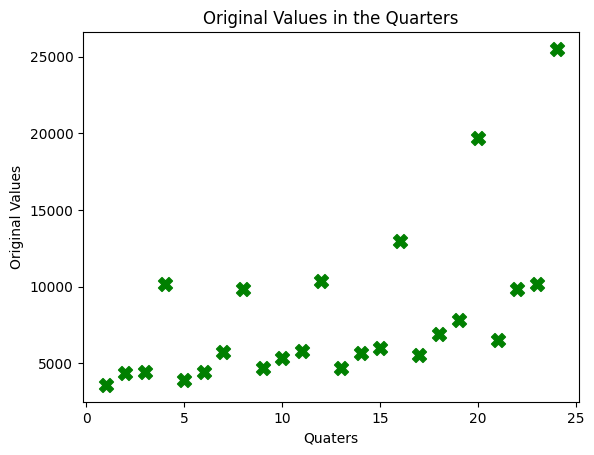

In [13]:
from matplotlib import pyplot as plt

quarters = np.arange(1, 25)

plt.scatter(quarters, original_values, marker = "X", s = 100, c = 'g')

plt.xlabel("Quaters")
plt.ylabel("Original Values")
plt.title("Original Values in the Quarters")

plt.show()

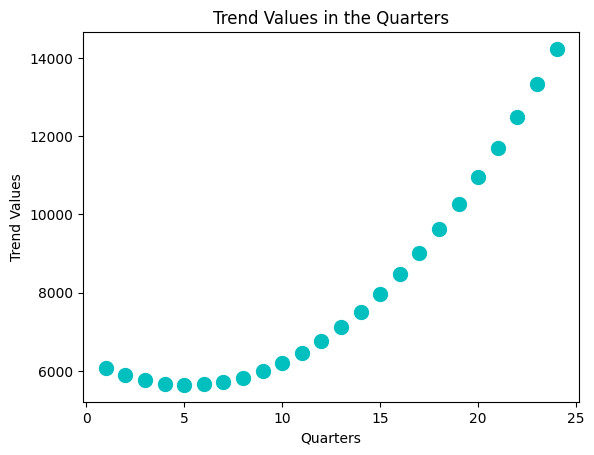

In [14]:
plt.scatter(quarters, trend_values, marker = "o", c = 'c', s = 100)

plt.xlabel("Quarters")
plt.ylabel("Trend Values")
plt.title("Trend Values in the Quarters")

plt.show()

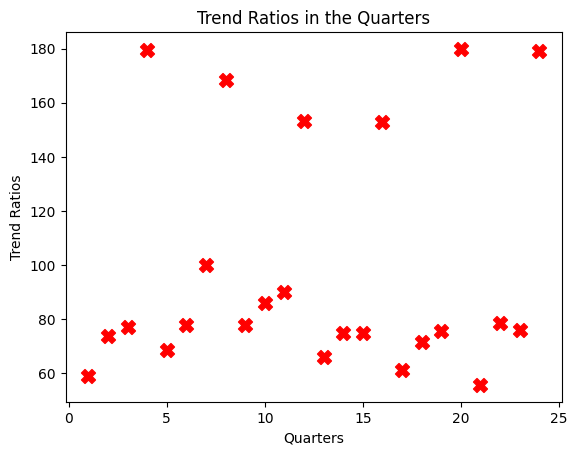

In [15]:
plt.scatter(quarters, trend_ratios, marker = "X", c = 'r', s = 100)

plt.xlabel("Quarters")
plt.ylabel("Trend Ratios")
plt.title("Trend Ratios in the Quarters")

plt.show()